<a href="https://colab.research.google.com/github/absolution747/Tensor-Flow/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Copyright 2020 MIT 6.S191 Introduction to Deep Learning. All Rights Reserved.
# 
# Licensed under the MIT License. You may not use this file except in compliance
# with the License. Use and/or modification of this code outside of 6.S191 must
# reference:
#
# © MIT 6.S191: Introduction to Deep Learning
# http://introtodeeplearning.com
#

In [0]:
# Import Tensorflow 2.0
%tensorflow_version 2.x
import tensorflow as tf 

!pip install mitdeeplearning
import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

# Check that we are using a GPU, if not switch runtimes
#   using Runtime > Change Runtime Type > GPU
assert len(tf.config.list_physical_devices('GPU')) > 0

TensorFlow 2.x selected.
     |████████████████████████████████| 2.1MB 5.0MB/s 
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.1.2-cp36-none-any.whl size=2114586 sha256=e867901703b80504c8ab6821c9606025519cd1e96915d696059c2dc0c0d2fd09
  Stored in directory: /root/.cache/pip/wheels/27/e1/73/5f01c787621d8a3c857f59876c79e304b9b64db9ff5bd61b74
Successfully built mitdeeplearning


## 1.1 MNIST dataset 

Let's download and load the dataset and display a few random samples from it:

In [0]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

11493376/11490434 [==============================] - 0s 0us/step


Our training set is made up of 28x28 grayscale images of handwritten digits. 

Let's visualize what some of these images and their corresponding training labels look like.

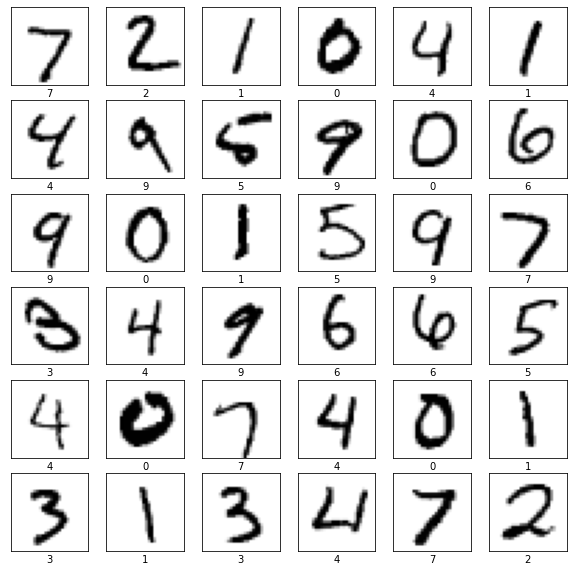

In [0]:
plt.figure(figsize=(10,10))
#random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    #image_ind = random_inds[i]
    plt.imshow(np.squeeze(test_images[i]), cmap=plt.cm.binary)
    plt.xlabel(test_labels[i])

## 1.2 Neural Network for Handwritten Digit Classification

We'll first build a simple neural network consisting of two fully connected layers and apply this to the digit classification task. Our network will ultimately output a probability distribution over the 10 digit classes (0-9). This first architecture we will be building is depicted below:

![alt_text](https://raw.githubusercontent.com/aamini/introtodeeplearning/master/lab2/img/mnist_2layers_arch.png "CNN Architecture for MNIST Classification")


### Fully connected neural network architecture
To define the architecture of this first fully connected neural network, we'll once again use the Keras API and define the model using the [`Sequential`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential) class. Note how we first use a [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) layer, which flattens the input so that it can be fed into the model. 

In this next block, you'll define the fully connected layers of this simple work.

In [0]:
def build_fc_model():
  fc_model = tf.keras.Sequential([
      # First define a Flatten layer
      tf.keras.layers.Flatten(),

      # '''TODO: Define the activation function for the first fully connected (Dense) layer.'''
      tf.keras.layers.Dense(128, activation= tf.nn.relu),

      # '''TODO: Define the second Dense layer to output the classification probabilities'''
      tf.keras.layers.Dense(10, activation= tf.nn.softmax)
    
      
  ])
  return fc_model

model = build_fc_model()

In [0]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the model



In [0]:
# Define the batch size and the number of epochs to use during training
BATCH_SIZE = 64
EPOCHS = 5

model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3690 - accuracy: 0.8965
Epoch 2/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.1958 - accuracy: 0.9439
Epoch 3/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.1480 - accuracy: 0.9575
Epoch 4/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.1212 - accuracy: 0.9653
Epoch 5/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.1025 - accuracy: 0.9707


In [0]:
test_loss, test_acc = model.evaluate(test_images,test_labels) # TODO

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 60us/sample - loss: 0.1035 - accuracy: 0.9693
Test accuracy: 0.9693


## 1.3 Convolutional Neural Network (CNN) for handwritten digit classification

In [0]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([

        # TODO: Define the first convolutional layer
        tf.keras.layers.Conv2D(filters=24,kernel_size=(3,3),activation=tf.nn.relu), 

        # TODO: Define the first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        # TODO: Define the second convolutional layer
        tf.keras.layers.Conv2D(filters=24,kernel_size=(3,3),activation=tf.nn.relu),

        # TODO: Define the second max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # TODO: Define the last Dense layer to output the classification 
        # probabilities. Pay attention to the activation needed a probability
        # output
         tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model()
# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])
# Print the summary of the layers in the model.
print(cnn_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  240       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  5208      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  76928     
_________________________________________________________________
dense_3 (Dense)              multiple                 

### Train and test the CNN model

Now, as before, we can define the loss function, optimizer, and metrics through the `compile` method. Compile the CNN model with an optimizer and learning rate of choice:

In [0]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy']) # TODO

As was the case with the fully connected model, we can train our CNN using the `fit` method via the Keras API.

In [0]:
cnn_model.fit(train_images,train_labels,batch_size=BATCH_SIZE,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.1992 - accuracy: 0.9412
Epoch 2/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0595 - accuracy: 0.9820
Epoch 3/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0426 - accuracy: 0.9870
Epoch 4/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0319 - accuracy: 0.9901
Epoch 5/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0261 - accuracy: 0.9915


Great! Now that we've trained the model, let's evaluate it on the test dataset using the [`evaluate`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#evaluate) method:

In [0]:

test_loss, test_acc = model.evaluate(test_images,test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 52us/sample - loss: 0.1035 - accuracy: 0.9693
Test accuracy: 0.9693


In [0]:
predictions = cnn_model.predict(test_images)

With this function call, the model has predicted the label for each image in the testing set. Let's take a look at the prediction for the first image in the test dataset:

In [0]:
predictions[0]

array([3.48405784e-08, 5.62223157e-08, 5.81974518e-06, 2.32714337e-05,
       1.16733831e-08, 3.91895433e-10, 1.74758496e-13, 9.99969959e-01,
       1.10334184e-07, 7.33547552e-07], dtype=float32)

In [0]:
prediction = np.argmax(predictions[0])

print(prediction)

7


Label of this digit is: 7


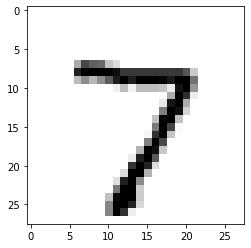

In [0]:
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)

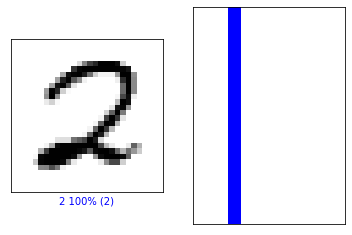

In [0]:
#@title Change the slider to look at the model's predictions! { run: "auto" }

image_index = 35 #@param {type:"slider", min:0, max:100, step:1}
plt.subplot(1,2,1)
mdl.lab2.plot_image_prediction(image_index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
mdl.lab2.plot_value_prediction(image_index, predictions,  test_labels)

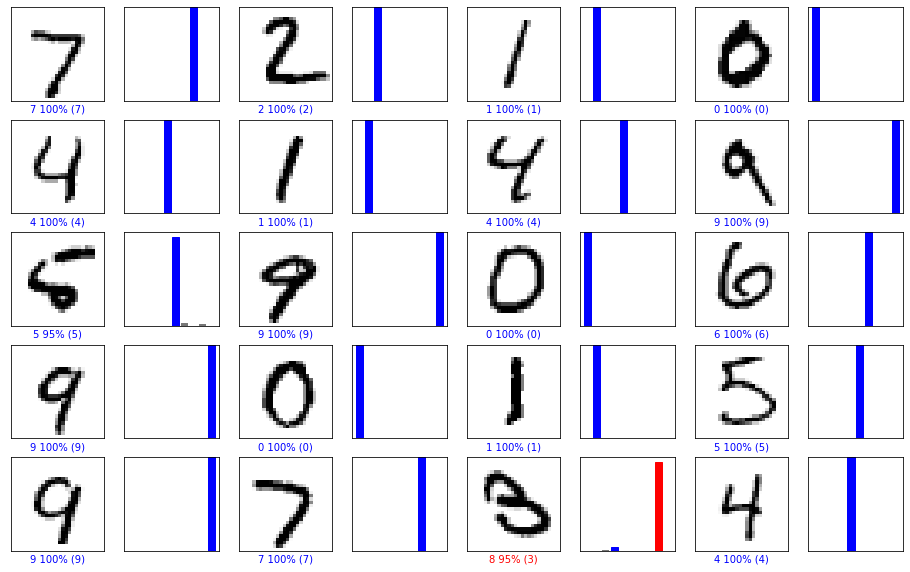

In [0]:
# Plots the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  mdl.lab2.plot_image_prediction(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  mdl.lab2.plot_value_prediction(i, predictions, test_labels)


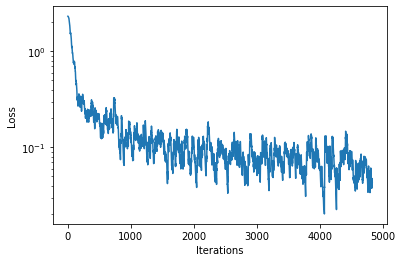

100%|██████████| 5000/5000 [00:41<00:00, 120.54it/s]


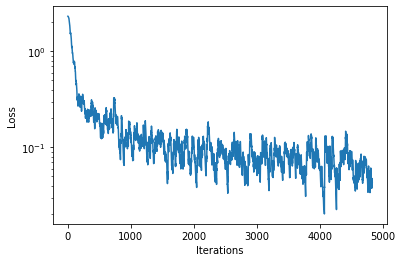

In [0]:
# Rebuild the CNN model
cnn_model = build_cnn_model()

batch_size = 12
loss_history = mdl.util.LossHistory(smoothing_factor=0.95) # to record the evolution of the loss
plotter = mdl.util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss', scale='semilogy')
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2) # define our optimizer

if hasattr(tqdm, '_instances'): tqdm._instances.clear() # clear if it exists

for idx in tqdm(range(0, train_images.shape[0], batch_size)):
  # First grab a batch of training data and convert the input images to tensors
  (images, labels) = (train_images[idx:idx+batch_size], train_labels[idx:idx+batch_size])
  images = tf.convert_to_tensor(images, dtype=tf.float32)

  # GradientTape to record differentiation operations
  with tf.GradientTape() as tape:
    #'''TODO: feed the images into the model and obtain the predictions'''
    logits = cnn_model(images) # TODO

    #'''TODO: compute the categorical cross entropy loss
    loss_value = tf.keras.backend.sparse_categorical_crossentropy(labels,logits) # TODO

  loss_history.append(loss_value.numpy().mean()) # append the loss to the loss_history record
  plotter.plot(loss_history.get())

  # Backpropagation 
  grads = tape.gradient(loss_value,cnn_model.trainable_variables) # TODO
  optimizer.apply_gradients(zip(grads, cnn_model.trainable_variables))
